In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загрузим датасет

In [2]:
method = {
    'k_means': 'data/data_k_means.csv', 
    'agglomerative': 'data/data_agglomerative.csv',
}
file = method['agglomerative']
df = pd.read_csv(file, low_memory=False)

Заменим номер кластеров так, чтобы 1 был самый плохой, а 6 самый лучший

In [3]:
new_order = {
    3: 6, 
    1: 5, 
    5: 4, 
    4: 3, 
    0: 2, 
    2: 1,
}
df['cluster'] = df['cluster'].map(new_order)

Цвета для графиков

In [4]:
colors = ['#FF0000', '#FF4000', '#FF8000', '#FFFF00', '#80FF00', '#00FF00']

График количества школ в кластерах

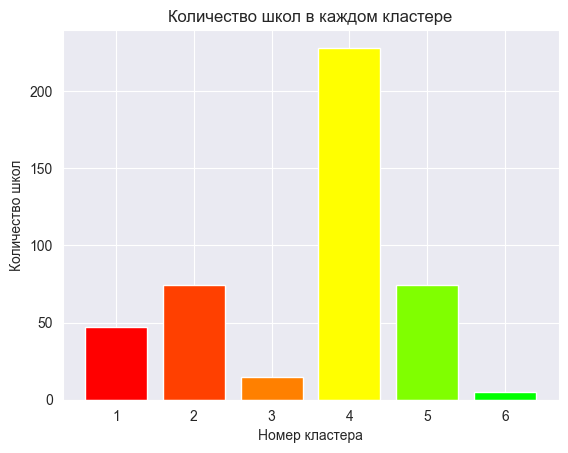

In [5]:
cluster_counts = df['cluster'].value_counts().sort_index()

plt.bar(cluster_counts.index, cluster_counts.values, color=colors)

plt.xlabel('Номер кластера')
plt.ylabel('Количество школ')
plt.title('Количество школ в каждом кластере')

plt.show()

Добавим среднюю оценку

In [6]:
df['Средняя оценка'] = (df['Math'] + df['Rus']) / 2

Диаграммы с усами

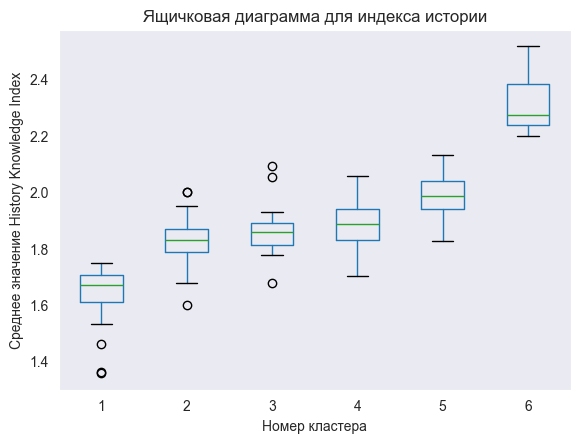

In [7]:
df.boxplot(by='cluster',column='Average History Knowledge Index', grid=False)
plt.xlabel('Номер кластера')
plt.ylabel('Среднее значение History Knowledge Index')
plt.title('Ящичковая диаграмма для индекса истории')
plt.suptitle('')

plt.show()

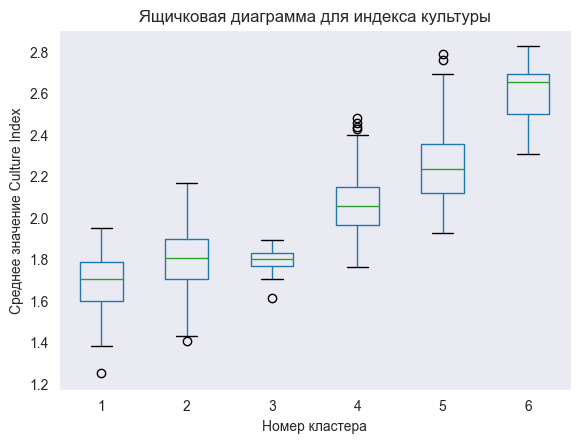

In [8]:
df.boxplot(by='cluster',column='Average Culture Index', grid=False)

plt.xlabel('Номер кластера')
plt.ylabel('Среднее значение Culture Index')
plt.title('Ящичковая диаграмма для индекса культуры')
plt.suptitle('') 


plt.show()

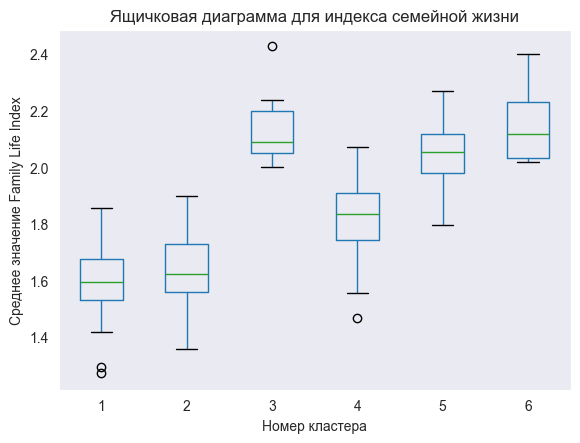

In [9]:
df.boxplot(by='cluster',column='Average Family Life Index', grid=False)

plt.xlabel('Номер кластера')
plt.ylabel('Среднее значение Family Life Index')
plt.title('Ящичковая диаграмма для индекса семейной жизни')
plt.suptitle('')

plt.show()

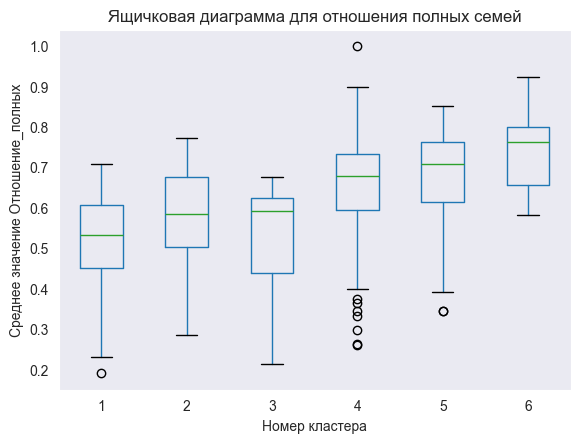

In [10]:
df.boxplot(by='cluster',column='Отношение_полных', grid=False)

plt.xlabel('Номер кластера')
plt.ylabel('Среднее значение Отношение_полных')
plt.title('Ящичковая диаграмма для отношения полных семей')
plt.suptitle('') 

plt.show()

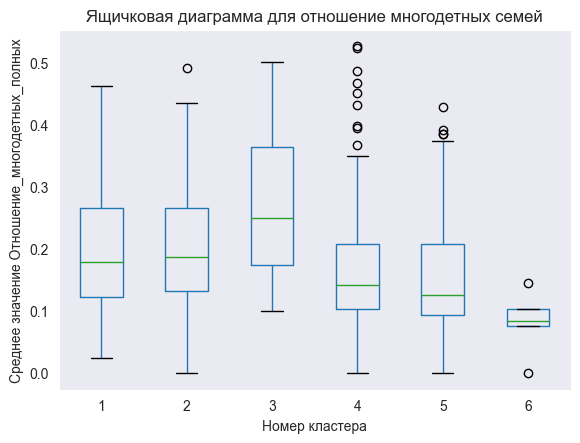

In [11]:
df.boxplot(by='cluster',column='Отношение_многодетных_полных', grid=False)

plt.xlabel('Номер кластера')
plt.ylabel('Среднее значение Отношение_многодетных_полных')
plt.title('Ящичковая диаграмма для отношение многодетных семей')
plt.suptitle('')

plt.show()

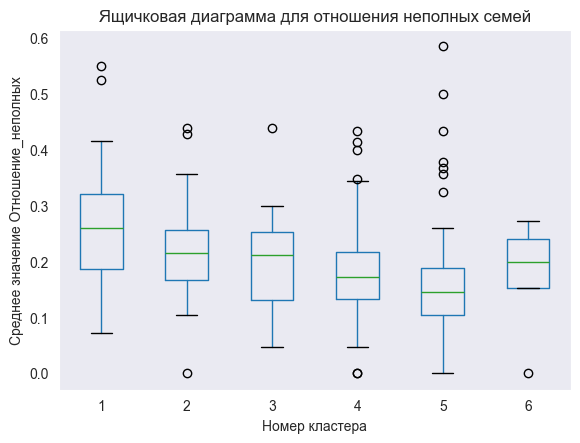

In [12]:
df.boxplot(by='cluster',column='Отношение_неполных', grid=False)

plt.xlabel('Номер кластера')
plt.ylabel('Среднее значение Отношение_неполных')
plt.title('Ящичковая диаграмма для отношения неполных семей')
plt.suptitle('') 

plt.show()

Корреляции среди всех данных

- **0.0 - 0.19**: очень слабая связь
- **0.20 - 0.39**: слабая связь
- **0.40 - 0.59**: умеренная связь
- **0.60 - 0.79**: сильная связь
- **0.80 - 1.0**: очень сильная связь

In [13]:
fields = {
    1: 'Average History Knowledge Index',
    2: 'Average Culture Index',
    3: 'Average Family Life Index',
    4: 'Отношение_полных',
    5: 'Отношение_многодетных_полных',
    6: 'Отношение_неполных',
    7: 'Salary',
    8: 'Math',
    9: 'Rus',
    10: 'Средняя оценка',
    11: 'ПБ',
}

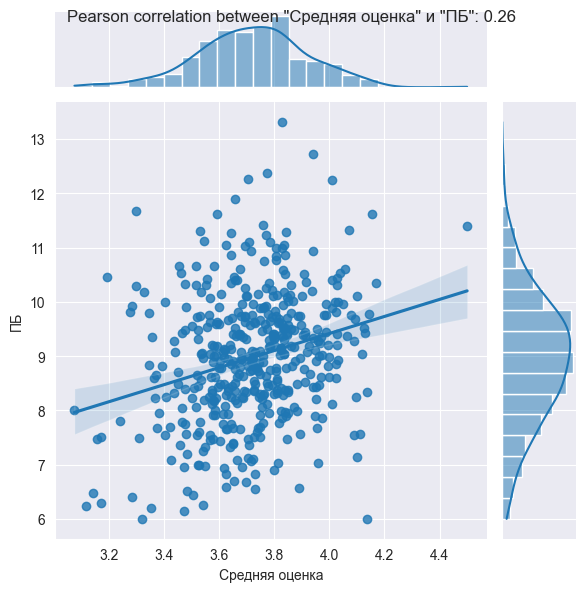

In [14]:
field1 = fields[10]
field2 = fields[11]
correlation = df[field1].corr(df[field2])

# Построение графика корреляции
sns.jointplot(x=field1, y=field2, data=df, kind='reg')

plt.suptitle(
    f'Pearson correlation between "{field1}" и "{field2}": {correlation:.2f}'
)
plt.show()

Таблица корреляции между всеми данными

In [15]:
fields = [
    'Average History Knowledge Index', 'Average Culture Index', 'Average Family Life Index', 
    'Math', 'Rus', 'Средняя оценка', 'ПБ', 
    'Отношение_полных', 'Отношение_многодетных_полных', 'Отношение_неполных'
]
df[fields].corr()

,Average History Knowledge Index,Average Culture Index,Average Family Life Index,Math,Rus,Средняя оценка,ПБ,Отношение_полных,Отношение_многодетных_полных,Отношение_неполных
Average History Knowledge Index,1.000000,0.680985,0.523312,0.220110,0.147880,0.198482,0.795277,0.223028,-0.113913,-0.195048
Average Culture Index,0.680985,1.000000,0.458367,0.274307,0.238179,0.276161,0.879224,0.323314,-0.235985,-0.200638
Average Family Life Index,0.523312,0.458367,1.000000,0.250309,0.208109,0.247066,0.672251,0.227739,-0.070013,-0.252836
Math,0.220110,0.274307,0.250309,1.000000,0.723688,0.929455,0.278895,0.391425,-0.182101,-0.362973
Rus,0.147880,0.238179,0.208109,0.723688,1.000000,0.927248,0.206124,0.389312,-0.197055,-0.342542
Средняя оценка,0.198482,0.276161,0.247066,0.929455,0.927248,1.000000,0.261514,0.420501,-0.204148,-0.380061
ПБ,0.795277,0.879224,0.672251,0.278895,0.206124,0.261514,1.000000,0.246131,-0.122131,-0.219404
Отношение_полных,0.223028,0.323314,0.227739,0.391425,0.389312,0.420501,0.246131,1.000000,-0.733639,-0.616228
Отношение_многодетных_полных,-0.113913,-0.235985,-0.070013,-0.182101,-0.197055,-0.204148,-0.122131,-0.733639,1.000000,-0.083095
Отношение_неполных,-0.195048,-0.200638,-0.252836,-0.362973,-0.342542,-0.380061,-0.219404,-0.616228,-0.083095,1.000000


Таблица корреляции среди одного кластера

In [16]:
fields = [
    'Average History Knowledge Index', 'Average Culture Index', 'Average Family Life Index', 
    'Math', 'Rus', 'Средняя оценка', 'ПБ', 'Отношение_полных', 'Отношение_многодетных_полных', 'Отношение_неполных'
        ]
cluster = 3
df[df['cluster'] == cluster][fields].corr()

,Average History Knowledge Index,Average Culture Index,Average Family Life Index,Math,Rus,Средняя оценка,ПБ,Отношение_полных,Отношение_многодетных_полных,Отношение_неполных
Average History Knowledge Index,1.000000,0.230204,0.519204,-0.236745,-0.111926,-0.191117,0.707820,-0.479309,0.506229,0.083078
Average Culture Index,0.230204,1.000000,0.178678,-0.478685,-0.515797,-0.531132,0.411185,-0.178902,0.160441,0.062883
Average Family Life Index,0.519204,0.178678,1.000000,-0.341711,-0.261286,-0.325707,0.589414,-0.713001,0.649546,0.239300
Math,-0.236745,-0.478685,-0.341711,1.000000,0.743099,0.942397,-0.150481,0.681768,-0.590401,-0.263132
Rus,-0.111926,-0.515797,-0.261286,0.743099,1.000000,0.924132,-0.223209,0.419498,-0.466816,-0.046149
Средняя оценка,-0.191117,-0.531132,-0.325707,0.942397,0.924132,1.000000,-0.197490,0.598947,-0.570433,-0.173304
ПБ,0.707820,0.411185,0.589414,-0.150481,-0.223209,-0.197490,1.000000,-0.343951,0.315107,0.113463
Отношение_полных,-0.479309,-0.178902,-0.713001,0.681768,0.419498,0.598947,-0.343951,1.000000,-0.688165,-0.584766
Отношение_многодетных_полных,0.506229,0.160441,0.649546,-0.590401,-0.466816,-0.570433,0.315107,-0.688165,1.000000,-0.186155
Отношение_неполных,0.083078,0.062883,0.239300,-0.263132,-0.046149,-0.173304,0.113463,-0.584766,-0.186155,1.000000


Средние оценки среди кластеров

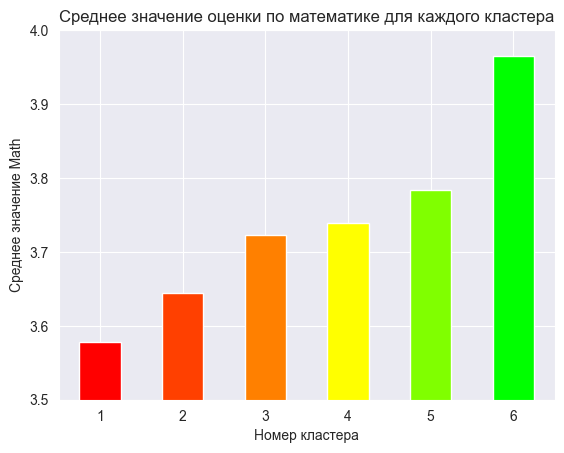

In [17]:
grouped_data = df.groupby('cluster')['Math'].mean()

grouped_data.plot(kind='bar', color=colors)

plt.title('Среднее значение оценки по математике для каждого кластера')
plt.xlabel('Номер кластера')
plt.ylabel('Среднее значение Math')

plt.ylim(3.5, 4)

plt.xticks(rotation=0)
plt.show()

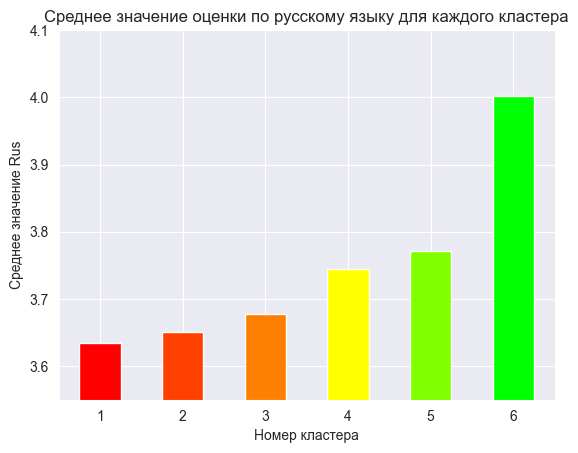

In [18]:
grouped_data = df.groupby('cluster')['Rus'].mean()

grouped_data.plot(kind='bar', color=colors)

plt.title('Среднее значение оценки по русскому языку для каждого кластера')
plt.xlabel('Номер кластера')
plt.ylabel('Среднее значение Rus')

plt.ylim(3.55, 4.1)

plt.xticks(rotation=0) 
plt.show()

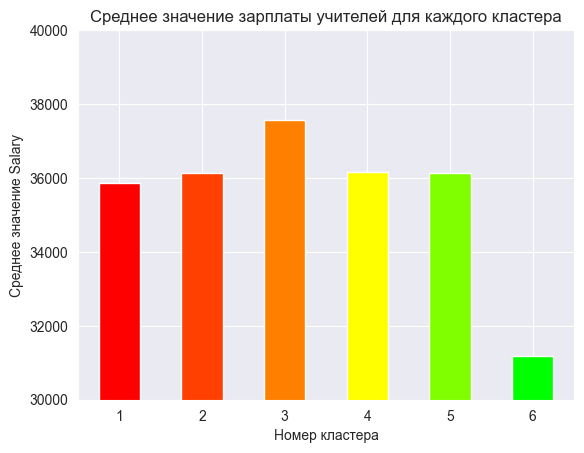

In [19]:
grouped_data = df.groupby('cluster')['Salary'].mean()

grouped_data.plot(kind='bar', color=colors)

plt.title('Среднее значение зарплаты учителей для каждого кластера')
plt.xlabel('Номер кластера')
plt.ylabel('Среднее значение Salary')

plt.ylim(30000, 40000)

plt.xticks(rotation=0)
plt.show()

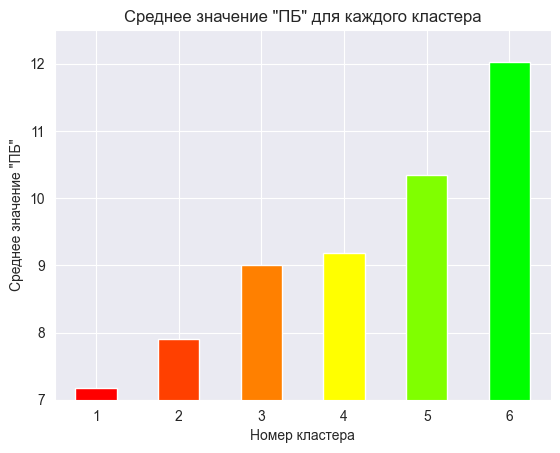

In [31]:
grouped_data = df.groupby('cluster')['ПБ'].mean()

grouped_data.plot(kind='bar', color=colors)

plt.title('Среднее значение "ПБ" для каждого кластера')
plt.xlabel('Номер кластера')
plt.ylabel('Среднее значение "ПБ"')

plt.ylim(7, 12.5)

plt.xticks(rotation=0)
plt.show()

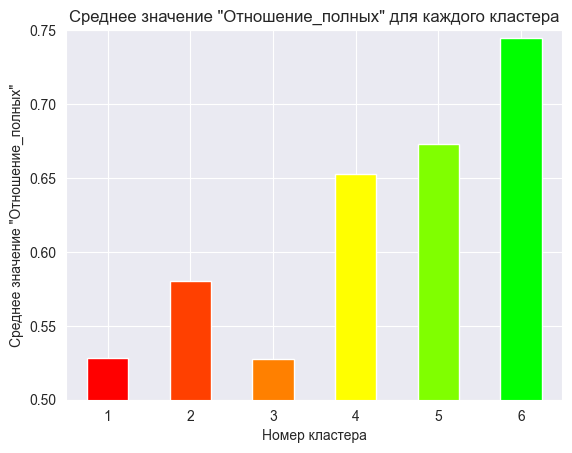

In [21]:
grouped_data = df.groupby('cluster')['Отношение_полных'].mean()

grouped_data.plot(kind='bar', color=colors)

plt.title('Среднее значение "Отношение_полных" для каждого кластера')
plt.xlabel('Номер кластера')
plt.ylabel('Среднее значение "Отношение_полных"')

plt.ylim(0.5, 0.75)

plt.xticks(rotation=0)
plt.show()  

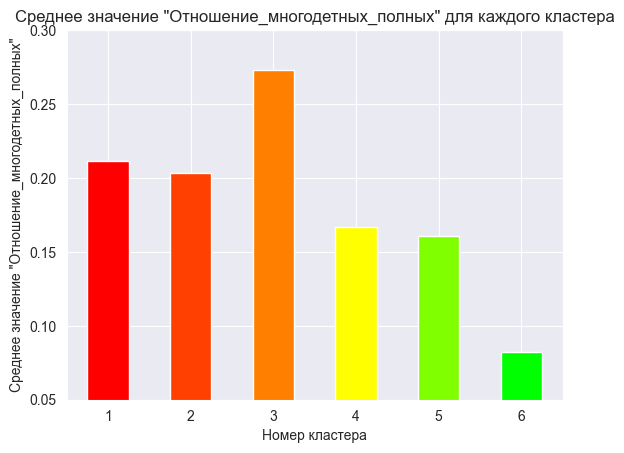

In [22]:
grouped_data = df.groupby('cluster')['Отношение_многодетных_полных'].mean()

grouped_data.plot(kind='bar', color=colors)

plt.title('Среднее значение "Отношение_многодетных_полных" для каждого кластера')
plt.xlabel('Номер кластера')
plt.ylabel('Среднее значение "Отношение_многодетных_полных"')

plt.ylim(0.05, 0.3)

plt.xticks(rotation=0)
plt.show()

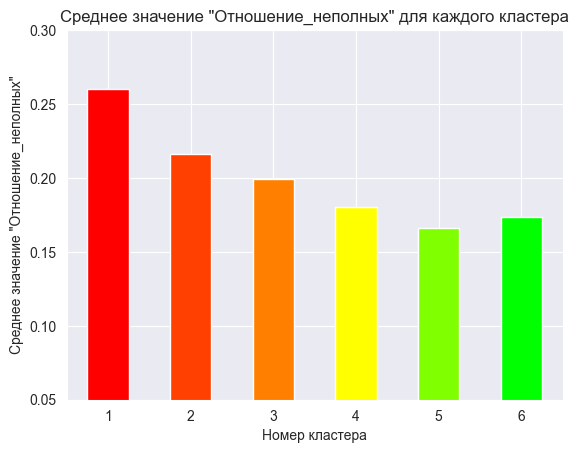

In [23]:
grouped_data = df.groupby('cluster')['Отношение_неполных'].mean()


grouped_data.plot(kind='bar', color=colors)

plt.title('Среднее значение "Отношение_неполных" для каждого кластера')
plt.xlabel('Номер кластера')
plt.ylabel('Среднее значение "Отношение_неполных"')

plt.ylim(0.05, 0.3)

plt.xticks(rotation=0)  
plt.show()

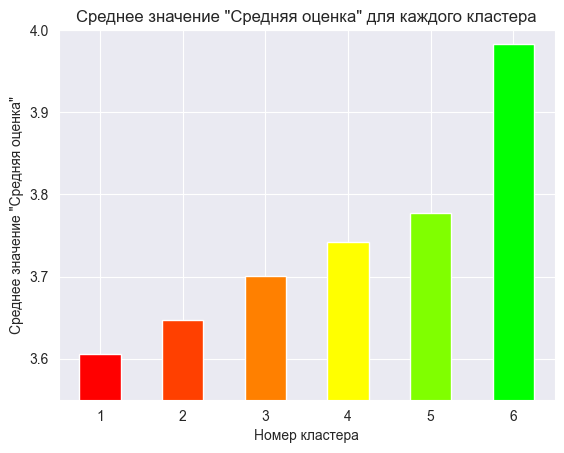

In [24]:
grouped_data = df.groupby('cluster')['Средняя оценка'].mean()

grouped_data.plot(kind='bar', color=colors)

plt.title('Среднее значение "Средняя оценка" для каждого кластера')
plt.xlabel('Номер кластера')
plt.ylabel('Среднее значение "Средняя оценка"')

plt.ylim(3.55, 4)

plt.xticks(rotation=0)  
plt.show()

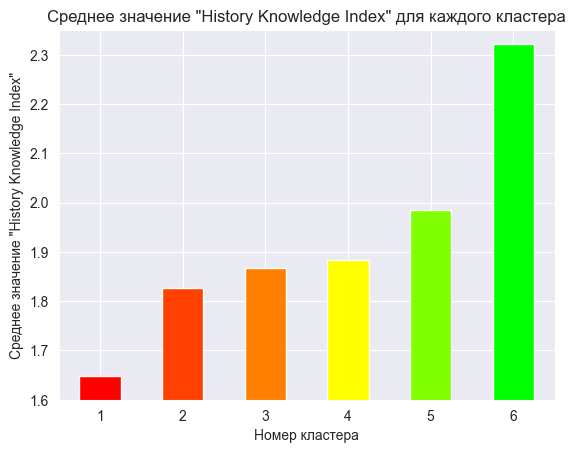

In [25]:
grouped_data = df.groupby('cluster')['Average History Knowledge Index'].mean()


grouped_data.plot(kind='bar', color=colors)

plt.title('Среднее значение "History Knowledge Index" для каждого кластера')
plt.xlabel('Номер кластера')
plt.ylabel('Среднее значение "History Knowledge Index"')

plt.ylim(1.6, 2.35)

plt.xticks(rotation=0) 
plt.show()

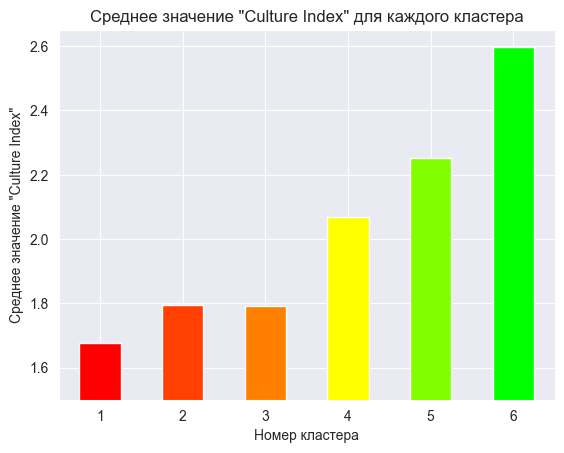

In [26]:
grouped_data = df.groupby('cluster')['Average Culture Index'].mean()

grouped_data.plot(kind='bar', color=colors)

plt.title('Среднее значение "Culture Index" для каждого кластера')
plt.xlabel('Номер кластера')
plt.ylabel('Среднее значение "Culture Index"')

plt.ylim(1.5, 2.65)

plt.xticks(rotation=0) 
plt.show()

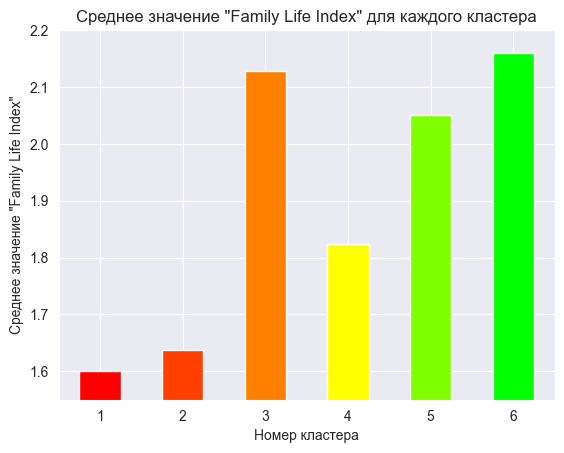

In [27]:
grouped_data = df.groupby('cluster')['Average Family Life Index'].mean()

grouped_data.plot(kind='bar', color=colors)

plt.title('Среднее значение "Family Life Index" для каждого кластера')
plt.xlabel('Номер кластера')
plt.ylabel('Среднее значение "Family Life Index"')

plt.ylim(1.55, 2.2)

plt.xticks(rotation=0)  
plt.show()

Диаграмма рассеяния

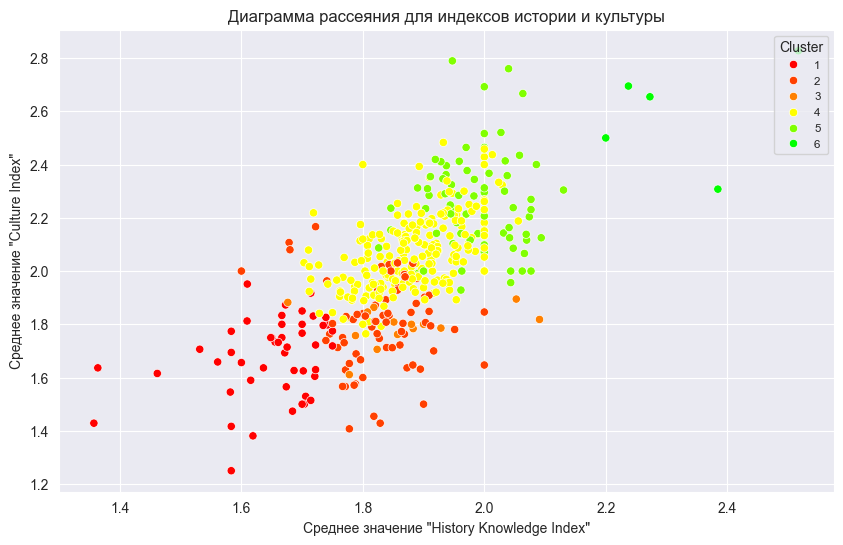

In [28]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    x='Average History Knowledge Index',
    y='Average Culture Index', 
    hue='cluster', 
    data=df,
    palette=colors,
)

plt.title('Диаграмма рассеяния для индексов истории и культуры')
plt.xlabel('Среднее значение "History Knowledge Index"')
plt.ylabel('Среднее значение "Culture Index"')

plt.legend(title='Cluster', fontsize='small', loc='upper right')

plt.show()

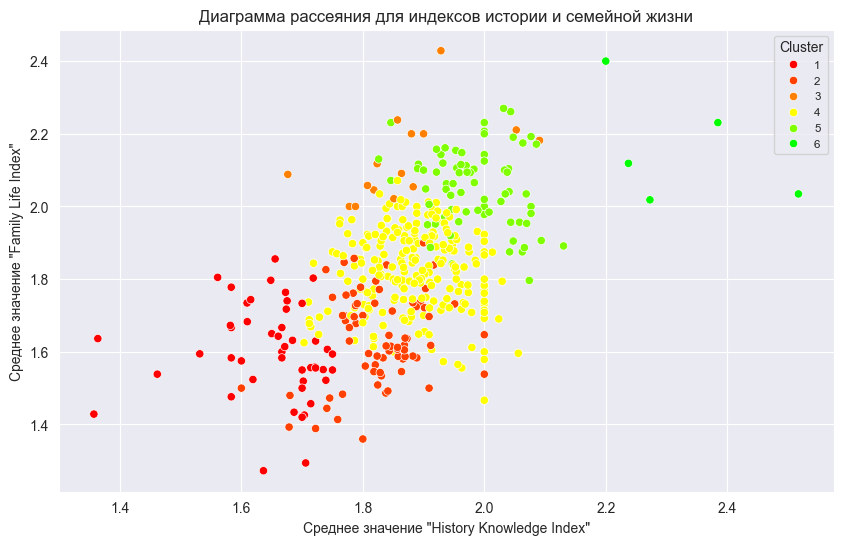

In [29]:
plt.figure(figsize=(10, 6)) 
scatter_plot = sns.scatterplot(
    x='Average History Knowledge Index', 
    y='Average Family Life Index', 
    hue='cluster', 
    data=df, 
    palette=colors
)

plt.title('Диаграмма рассеяния для индексов истории и семейной жизни')
plt.xlabel('Среднее значение "History Knowledge Index"')
plt.ylabel('Среднее значение "Family Life Index"')

plt.legend(title='Cluster', fontsize='small', loc='upper right')

plt.show()

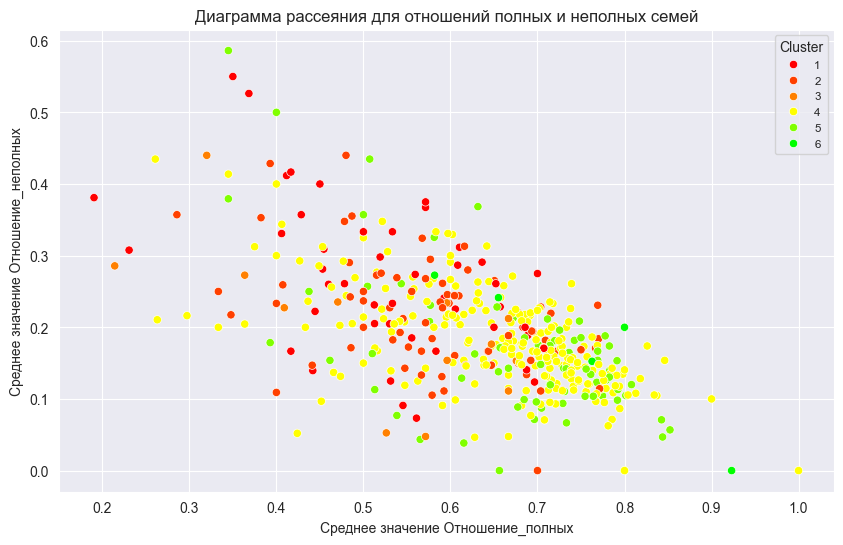

In [30]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    x='Отношение_полных', 
    y='Отношение_неполных', 
    hue='cluster', 
    data=df, 
    palette=colors
)

plt.title('Диаграмма рассеяния для отношений полных и неполных семей')
plt.xlabel('Среднее значение Отношение_полных')
plt.ylabel('Среднее значение Отношение_неполных')

plt.legend(title='Cluster', fontsize='small', loc='upper right')

plt.show()